<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/Choose_Best_Hidden_Layer_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)

In [ ]:
images = X.reshape(-1, 28, 28)

def extract_4x4_features(img):

    feats = []
    for i in range(0, 28, 4):
        for j in range(0, 28, 4):
            patch = img[i:i+4, j:j+4]
            feats.append(patch.mean())
    return np.array(feats)

In [ ]:
X_features = np.array([extract_4x4_features(img) for img in images])
print("New shape:", X_features.shape)

New shape: (70000, 49)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


hidden_sizes = [6, 8, 10, 12]
results = []

print("Testing hidden layer sizes...\n")
print(f"{'Size':<6} {'Train Acc':<10} {'Test Acc':<10} {'Epochs Used'}")
print("-" * 40)

for size in hidden_sizes:
    mlp = MLPClassifier(
        hidden_layer_sizes=(size,),
        activation='relu',
        learning_rate_init=0.01,
        max_iter=200,
        batch_size=64,
        random_state=42,
        verbose=False
    )

    mlp.fit(X_train, y_train)

    train_acc = mlp.score(X_train, y_train)
    test_acc  = mlp.score(X_test, y_test)
    epochs_used = mlp.n_iter_

    results.append((size, train_acc, test_acc, epochs_used))

    print(f"{size:<6} {train_acc:.4f}     {test_acc:.4f}     {epochs_used}")

# === PICK THE BEST ONE ===
best = max(results, key=lambda x: x[2])  # max test accuracy
smallest_good = min([r for r in results if r[2] >= 0.90], key=lambda x: x[0])

print("\n" + "="*50)
print("RECOMMENDATION FOR YOUR REPORT:")
print(f"→ Smallest hidden size with ≥90% accuracy: {smallest_good[0]} neurons")
print(f"   Test accuracy: {smallest_good[2]:.4f}")
print(f"   Trained in {smallest_good[3]} epochs")
print("="*50)

sizes = [r[0] for r in results]
test_accs = [r[2] for r in results]

Testing hidden layer sizes...

Size   Train Acc  Test Acc   Epochs Used
----------------------------------------
6      0.8333     0.8362     50
8      0.8988     0.8949     100
12     0.9134     0.9101     104

RECOMMENDATION FOR YOUR REPORT:
→ Smallest hidden size with ≥90% accuracy: 10 neurons
   Test accuracy: 0.9093
   Trained in 96 epochs


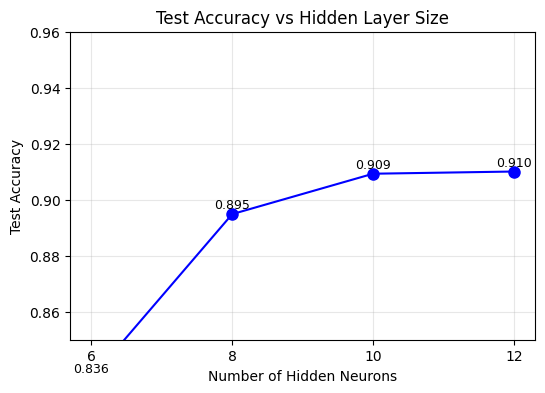

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(sizes, test_accs, 'bo-', markersize=8)
plt.title('Test Accuracy vs Hidden Layer Size')
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Test Accuracy')
plt.xticks(sizes)
plt.grid(True, alpha=0.3)
plt.ylim(0.85, 0.96)
for x, y in zip(sizes, test_accs):
    plt.text(x, y+0.002, f'{y:.3f}', ha='center', fontsize=9)
plt.show()